In [1]:
using Gadfly
using DataFrames
using DifferentialEquations

INFO: Recompiling stale cache file /home/wojciech/.julia/lib/v0.6/Gadfly.ji for module Gadfly.


In [2]:
Pkg.status("DataFrames")

 - DataFrames                    0.10.1


In [3]:
Pkg.status("DifferentialEquations")

 - DifferentialEquations         4.4.1


In [4]:
Gadfly.push_theme(:default)

In [5]:
set_default_plot_size(20cm, 7.5cm)

In [6]:
λ=1.5 
f(u,p,t) = - λ*u
u0=8.0
tspan = (0.0,10.0)
prob = ODEProblem(f,u0,tspan)

DiffEqBase.ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 8.0

In [7]:
λ=1.5 

sol = solve(prob, RK4(), dt=0.01)

retcode: Success
Interpolation: 3rd order Hermite
t: 47-element Array{Float64,1}:
  0.0      
  0.01     
  0.0511837
  0.113943 
  0.191958 
  0.290473 
  0.405547 
  0.537804 
  0.684364 
  0.844043 
  1.01461  
  1.19456  
  1.38221  
  ⋮        
  6.42762  
  6.68353  
  6.95025  
  7.23037  
  7.52699  
  7.84373  
  8.18493  
  8.55579  
  8.96271  
  9.41371  
  9.91904  
 10.0      
u: 47-element Array{Float64,1}:
 8.0        
 7.8809     
 7.40878    
 6.74315    
 5.99847    
 5.17445    
 4.35412    
 3.57063    
 2.86597    
 2.25555    
 1.74639    
 1.33329    
 1.00622    
 ⋮          
 0.000520402
 0.00035454 
 0.000237667
 0.000156154
 0.000100095
 6.22591e-5 
 3.73361e-5 
 2.14212e-5 
 1.16485e-5 
 5.93437e-6 
 2.79184e-6 
 2.47257e-6 

In [8]:
fieldnames(sol)

11-element Array{Symbol,1}:
 :u         
 :u_analytic
 :errors    
 :t         
 :k         
 :prob      
 :alg       
 :interp    
 :dense     
 :tslocation
 :retcode   

In [9]:
df1=DataFrame(t=sol.t, u=sol.u, lambda=λ)

,t,u,lambda
1,0.0,8.0,1.5
2,0.01,7.880895516875,1.5
3,0.05118371264202872,7.408781461300783,1.5
4,0.11394303350120857,6.743149266194524,1.5
5,0.1919577271575037,5.998474741284143,1.5
6,0.2904727649071622,5.174451456538486,1.5
7,0.40554749553347075,4.354120829431342,1.5
8,0.5378041760433632,3.5706252312423556,1.5
9,0.6843643988900882,2.8659661627037183,1.5
10,0.8440433907508356,2.2555527390470185,1.5


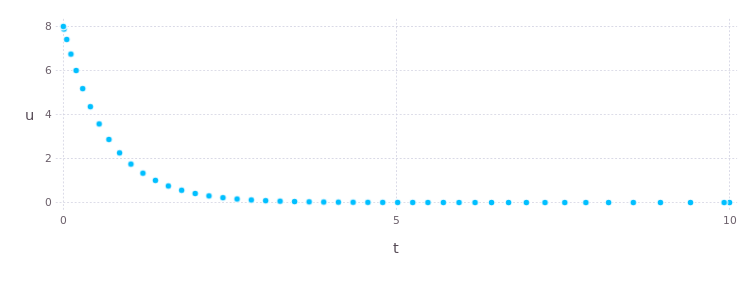

In [10]:
plot(df1,  x="t", y="u")

In [11]:
writetable("diffeq1.csv", df1)

In [12]:
λ=2.5 
sol = solve(prob, RK4(), dt=0.01)
df2=DataFrame(t=sol.t, u=sol.u, lambda=λ)

,t,u,lambda
1,0.0,8.0,2.5
2,0.01,7.802479296875,2.5
3,0.03878291058344541,7.260758372296338,2.5
4,0.07817078434309545,6.57986798279564,2.5
5,0.1286056069289379,5.800406030148587,2.5
6,0.1901134167775563,4.973676028341625,2.5
7,0.2620965453977645,4.154546249841477,2.5
8,0.3437053019283939,3.3878138059306657,2.5
9,0.43385972402745704,2.704195928232802,2.5
10,0.5314489738632288,2.1187797259371095,2.5


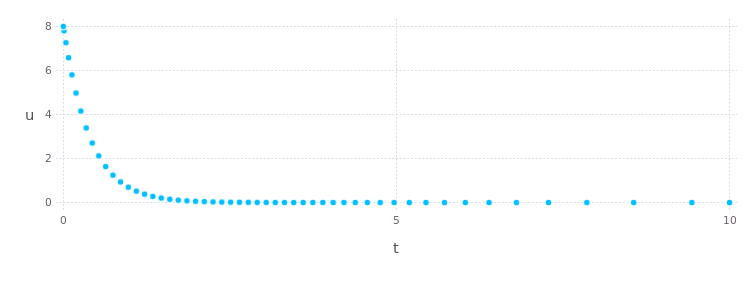

In [13]:
plot(df2,  x="t", y="u")

In [14]:
writetable("diffeq2.csv", df2)

In [15]:
df = vcat(df1,df2)

,t,u,lambda
1,0.0,8.0,1.5
2,0.01,7.880895516875,1.5
3,0.05118371264202872,7.408781461300783,1.5
4,0.11394303350120857,6.743149266194524,1.5
5,0.1919577271575037,5.998474741284143,1.5
6,0.2904727649071622,5.174451456538486,1.5
7,0.40554749553347075,4.354120829431342,1.5
8,0.5378041760433632,3.5706252312423556,1.5
9,0.6843643988900882,2.8659661627037183,1.5
10,0.8440433907508356,2.2555527390470185,1.5


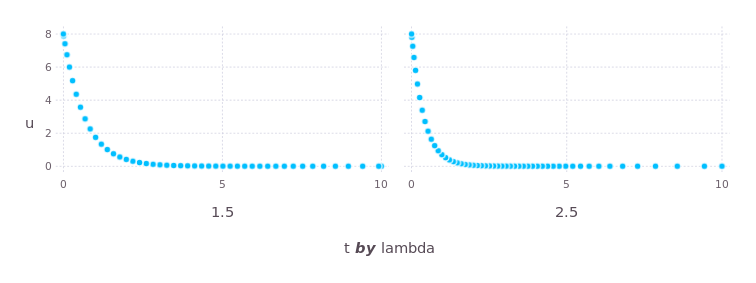

In [16]:
plot(df,  x="t", y="u", xgroup="lambda", Geom.subplot_grid(Geom.point))